In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']
data

,PG
Date,
2007-01-03,42.640114
2007-01-04,42.316383
2007-01-05,41.953007
2007-01-08,42.045513
2007-01-09,41.939812
...,...
2020-10-19,141.126404
2020-10-20,141.693237
2020-10-21,142.459000


In [5]:
log_returns = np.log(1 + data.pct_change())
log_returns

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002203
2007-01-09,-0.002517
...,...
2020-10-19,-0.017325
2020-10-20,0.004008
2020-10-21,0.005390


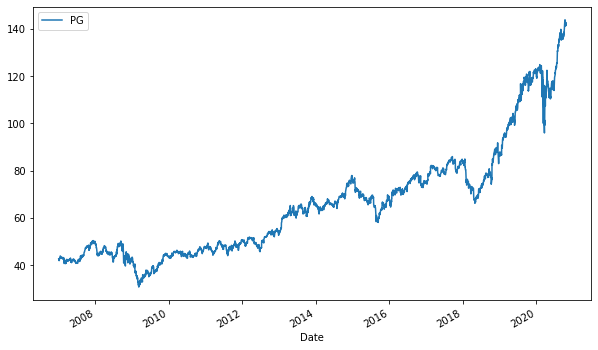

In [6]:
data.plot(figsize=(10, 6))

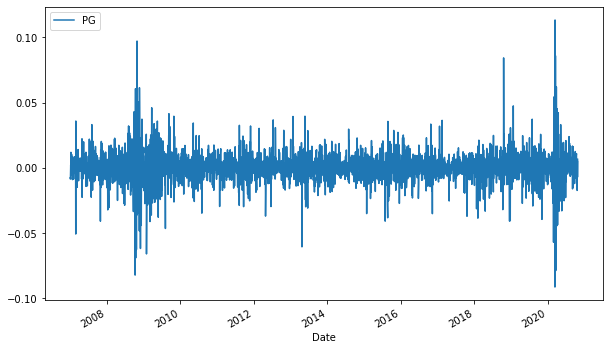

In [7]:
log_returns.plot(figsize=(10,6))

In [8]:
u = log_returns.mean()
u

PG    0.000347
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

## Finding the Drift a Variance for Brownian Motion

In [10]:
drift = u - (0.5 * var)
drift

PG    0.000276
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011894
dtype: float64

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00027604])

In [16]:
drift.values

array([0.00027604])

In [18]:
stdev.values

array([0.01189356])

In [20]:
norm.ppf(0.95) #distance between the event and the mean

1.6448536269514722

In [21]:
x = np.random.rand(10, 2)
x

array([[0.538416  , 0.24709225],
       [0.08229091, 0.68493773],
       [0.09434187, 0.65924013],
       [0.04176952, 0.94087191],
       [0.51518247, 0.42562365],
       [0.02961474, 0.78739039],
       [0.33015515, 0.54584486],
       [0.67639821, 0.09525747],
       [0.16686702, 0.08285255],
       [0.96671742, 0.69661015]])

In [22]:
norm.ppf(x)

array([[ 0.09644393, -0.68366855],
       [-1.38982569,  0.48155158],
       [-1.31448294,  0.41039019],
       [-1.73051085,  1.56213505],
       [ 0.03806599, -0.18752721],
       [-1.88648612,  0.7973992 ],
       [-0.4394848 ,  0.11517013],
       [ 0.45765046, -1.30905731],
       [-0.96661997, -1.38613689],
       [ 1.83459875,  0.51467563]])

In [23]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.18443893,  1.15406444],
       [ 0.32694006, -0.43435082],
       [ 0.67599465,  1.17817893],
       [-1.02155239,  0.15122523],
       [ 0.10746777, -1.19402782],
       [-0.07987936,  1.34925181],
       [-0.94669215, -1.40827163],
       [-0.53877633, -0.28533266],
       [-1.87485882, -0.68908095],
       [ 0.82484184,  0.63971568]])

In [24]:
t_intervals = 1000
iterations = 10

In [25]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [26]:
daily_returns

array([[0.99809686, 1.00914054, 1.01531848, ..., 0.99735702, 0.99931655,
        0.9936111 ],
       [0.99983939, 1.00490914, 1.00994551, ..., 1.00879249, 0.99892797,
        0.98432171],
       [1.00186424, 0.9938189 , 0.9851253 , ..., 0.99037723, 1.01889835,
        0.98676471],
       ...,
       [1.03002178, 1.00068754, 1.00728162, ..., 1.02676026, 1.0080091 ,
        0.99216389],
       [1.00612266, 1.00342028, 1.01202367, ..., 0.98895008, 1.01302309,
        0.9987543 ],
       [0.98341191, 0.98606511, 1.00280222, ..., 0.99936929, 0.97735536,
        1.00220042]])

In [28]:
S0 = data.iloc[-1] # use iloc to get today's price
S0

PG    142.380005
Name: 2020-10-23 00:00:00, dtype: float64

In [30]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
price_list[0] = S0
price_list

array([[142.38000488, 142.38000488, 142.38000488, ..., 142.38000488,
        142.38000488, 142.38000488],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [32]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [33]:
price_list

array([[142.38000488, 142.38000488, 142.38000488, ..., 142.38000488,
        142.38000488, 142.38000488],
       [142.35713676, 143.07896885, 143.79604699, ..., 143.63188028,
        142.22736962, 140.14772917],
       [142.62252471, 142.1945828 , 141.65712338, ..., 142.24974364,
        144.91523276, 138.29283286],
       ...,
       [312.17537641, 331.19132143, 185.61479414, ..., 264.53371313,
         60.52580836, 344.26309206],
       [314.08672109, 332.32408931, 187.84656468, ..., 261.61063578,
         61.31404125, 343.83424455],
       [308.87662321, 327.69319021, 188.37295281, ..., 261.44563611,
         59.92560693, 344.59082553]])

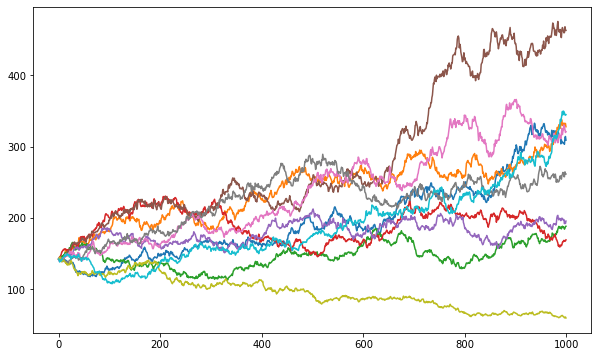

In [34]:
plt.figure(figsize=(10,6))
plt.plot(price_list);